In [1]:
#load liabraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as mtp

In [2]:
#load dataset
path=r'C:\Python\Python\bank.csv'
df=pd.read_csv(path)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df.shape

(11162, 17)

In [7]:
cat_features = df.select_dtypes('object').columns
cat_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [8]:
print('*All categorical features and their distinct values* \n')
for c in cat_features:
    
    print(c , ' --> ',df[c].unique())
    print()
   

*All categorical features and their distinct values* 

job  -->  ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

marital  -->  ['married' 'single' 'divorced']

education  -->  ['secondary' 'tertiary' 'primary' 'unknown']

default  -->  ['no' 'yes']

housing  -->  ['yes' 'no']

loan  -->  ['no' 'yes']

contact  -->  ['unknown' 'cellular' 'telephone']

month  -->  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome  -->  ['unknown' 'other' 'failure' 'success']

deposit  -->  ['yes' 'no']



In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Data Visulization

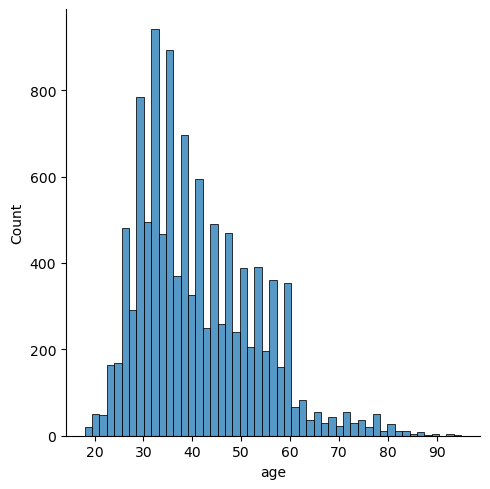

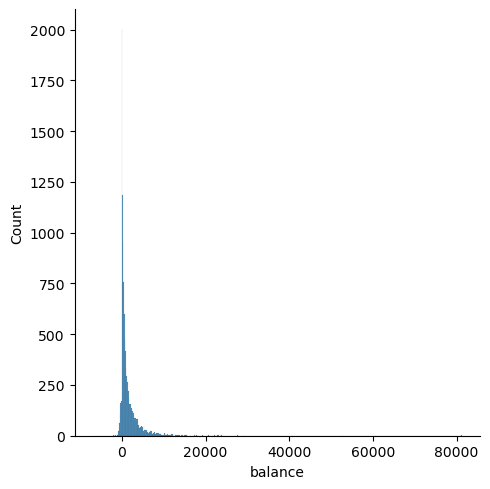

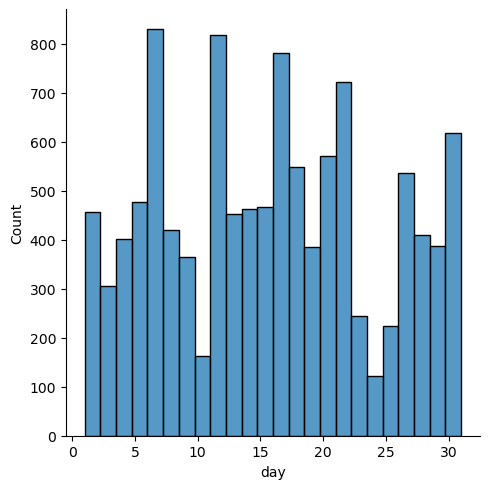

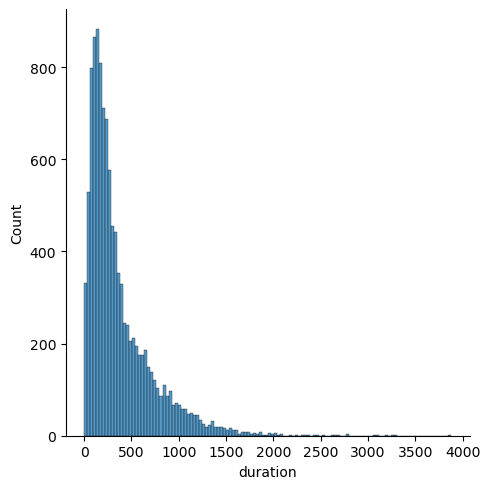

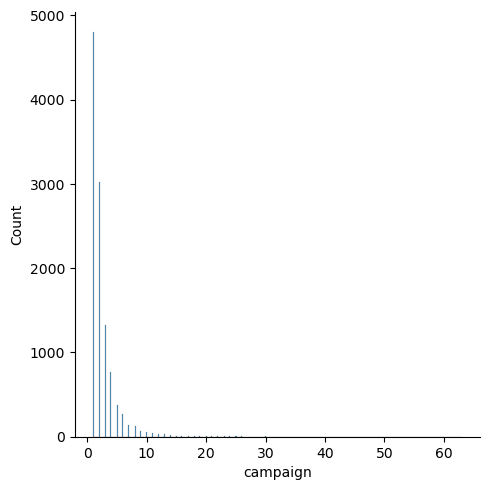

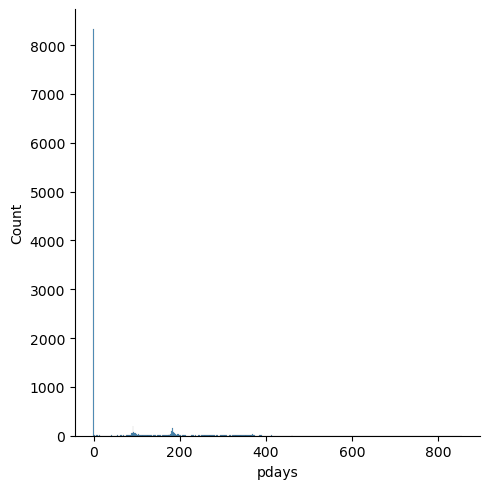

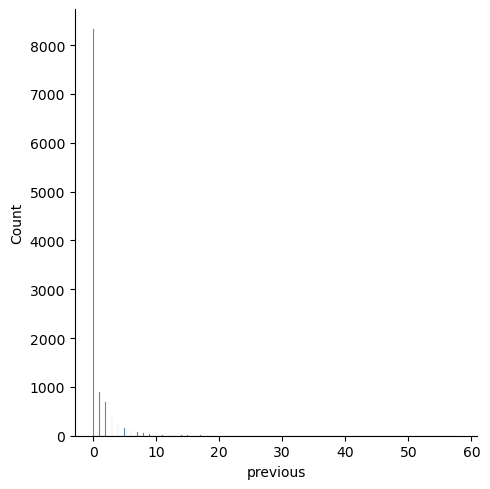

In [11]:
sns.displot(df.age)
sns.displot(df.balance)
sns.displot(df.day)
sns.displot(df.duration)
sns.displot(df.campaign)
sns.displot(df.pdays)
sns.displot(df.previous)

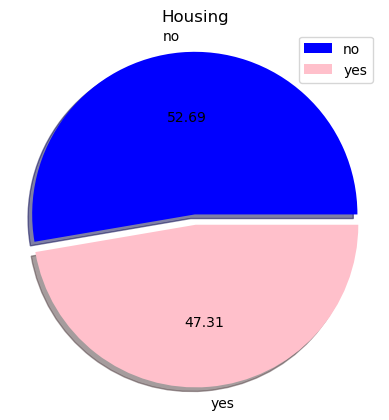

In [12]:


plt.subplot(1,1,1)
plt.pie(df['housing'].value_counts() ,colors =['b' ,'pink'] ,explode =[0 ,0.07] ,autopct ='%.2f',shadow = True,pctdistance =0.6 ,labels = ['no' ,'yes'] ,labeldistance=1.1,radius =1.1)
plt.title('Housing')
plt.legend()


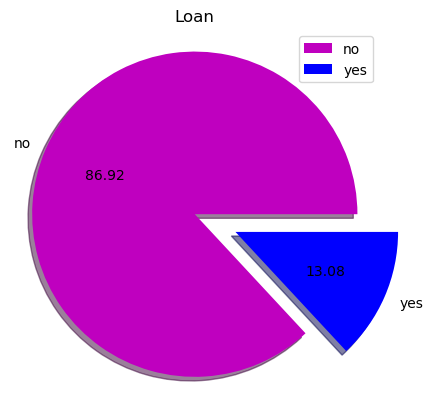

In [13]:
plt.subplot(1,1,1)
plt.pie(df['loan'].value_counts() ,colors =['m' ,'b'] ,explode =[0 ,0.3] ,autopct ='%.2f',shadow = True,pctdistance =0.6,labels= ['no' ,'yes'] ,labeldistance=1.1,radius =1.1)
plt.title('Loan')
plt.legend()

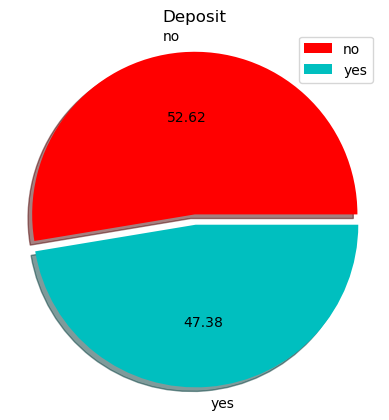

In [14]:
plt.subplot(1,1,1)
plt.pie(df['deposit'].value_counts() ,colors =['r' ,'c'] ,explode =[0 ,0.07] ,autopct ='%.2f' ,shadow = True,pctdistance =0.6,labels = ['no' ,'yes'] ,labeldistance=1.1,radius =1.1)
plt.title('Deposit')
plt.legend()


# Removing Outliers

In [15]:
df.groupby(['deposit' ,'default']).size()
#so dropping default as no imp role
#most of its values are no 

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [16]:
df.groupby(['deposit' ,'pdays']).size()
#similarly pdays also has no significance 
#most of its values are -1 

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [17]:
df.drop(columns =['default' ,'pdays'] ,axis =1 ,inplace = True)

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome', 'deposit'],
      dtype='object')

In [19]:
#handling outliers 
df.groupby('age' ,sort= True)['age'].count()
#these can be ignored and values lies b/w 18 - 95

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [20]:
df.groupby(['deposit' ,'balance'],sort = True)['balance'].count()
#need not to be remoevd as blaance gets higher ,client show interest on deposit

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [21]:
df.groupby(['deposit' ,'duration'],sort = True)['duration'].count()
#should not be removed as with increase in duration the client shows more interest in deposit

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [22]:
df.groupby(['deposit' ,'campaign'],sort = True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [23]:
#removing outliers
df2 = df[df['campaign'] <32]
df2.groupby(['deposit' ,'campaign'] ,sort = True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6             92
         7          

In [24]:
df2.groupby(['deposit' ,'previous'] ,sort= True)['previous'].count()

deposit  previous
no       0           4934
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3383
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [25]:
#removing outliers 
df3 = df2[df2['previous'] <31]


# Categorial feature encoding

In [26]:
df3.select_dtypes('object').columns

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'poutcome', 'deposit'],
      dtype='object')

In [27]:
cat_cols = ['job', 'marital', 'education' ,'contact', 'month','poutcome']
for  col in cat_cols:
    df3=pd.concat([df3.drop(col,axis =1) ,pd.get_dummies(df3[col] ,prefix =col ,drop_first=True ,dummy_na = False)],axis = 1)


In [28]:
#BOOLEAN TYPE FEATURES (YES /NO)
boolean_cols =['housing', 'loan','deposit']
for col in boolean_cols:
    df3[col +'_new']  =df3[col].apply(lambda x :1 if x =='yes' else 0)
    df3.drop(col ,axis =1 ,inplace = True)



In [29]:
df3

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,2343,5,1042,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,56,45,5,1467,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,41,1270,5,1389,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,55,2476,5,579,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,54,184,5,673,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
11158,39,733,16,83,4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11159,32,29,19,156,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11160,43,0,8,9,2,5,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [30]:
df3.deposit_new

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit_new, Length: 11150, dtype: int64

# split Data

In [31]:
x=df3.drop('deposit_new',axis=1)
y=df3['deposit_new']
print('shape of x =',x.shape)
print('shape of y =',y.shape)

shape of x = (11150, 40)
shape of y = (11150,)


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)
print('shape of x_train =',x_train.shape)
print('shape of y_train =',y_train.shape)
print('shape of x_test =',x_test.shape)
print('shape of y_test =',y_test.shape)

shape of x_train = (8920, 40)
shape of y_train = (8920,)
shape of x_test = (2230, 40)
shape of y_test = (2230,)


In [33]:
print(len(x_train) ,len(x_test))

8920 2230


# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train= sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [35]:
x_train

array([[ 1.14786208, -0.4623037 , -1.02368078, ...,  0.58356408,
         1.06224777, -0.38452233],
       [-1.19105183, -0.18122141,  0.88111474, ...,  0.58356408,
        -0.94139996, -0.38452233],
       [ 0.39606833, -0.27026182, -0.07128302, ...,  0.58356408,
         1.06224777, -0.38452233],
       ...,
       [-0.68985599,  0.03005568, -1.38082994, ..., -1.71360786,
         1.06224777, -0.38452233],
       [-0.85692127, -0.56344368,  0.16681642, ...,  0.58356408,
         1.06224777, -0.38452233],
       [ 0.06193777,  1.16989711,  0.76206502, ..., -1.71360786,
         1.06224777, -0.38452233]])

# Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [37]:
model=RandomForestClassifier()

In [38]:
rf_model_scores = cross_val_score(estimator=RandomForestClassifier(),X=x_train ,y= y_train,cv =5)
print(rf_model_scores)
print(rf_model_scores.mean())

[0.8396861  0.85706278 0.86042601 0.84248879 0.84248879]
0.8484304932735427


# Support vector classification

In [39]:
from sklearn.svm import SVC #SVC = classification

In [52]:
model=SVC()

In [53]:
classification_rbf=SVC(kernel="rbf")
classification_rbf.fit(x_train,y_train)

SVC()

In [54]:
classification_rbf.score(x_test,y_test)

0.8556053811659193

# K Fold Cross Validation

In [59]:
rf_model_scores=cross_val_score(model,x,y,cv=2)
print(rf_model_scores)
print("Avg:",np.average(rf_model_scores))

[0.77345291 0.65327354]
Avg: 0.7133632286995516


In [60]:
classification_rbf_scores=cross_val_score(model,x,y,cv=2)
print(rf_model_scores)
print("Avg:",np.average(classification_rbf_scores))

[0.77345291 0.65327354]
Avg: 0.7133632286995516


# Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix



In [62]:
actual_values = [1, 0, 1, 0, 1, 1, 0, 1, 0, 0]


predicted_values = [1, 0, 0, 0, 1, 1, 1, 1, 0, 0]


cm = confusion_matrix(actual_values, predicted_values)


tn, fp, fn, tp = cm.ravel()



Text(50.722222222222214, 0.5, 'True Value')

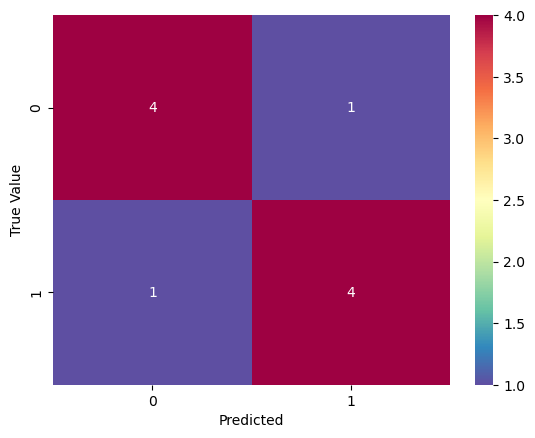

In [63]:
sns.heatmap(cm ,annot = True ,cmap ='Spectral_r')
plt.xlabel('Predicted')
plt.ylabel('True Value')

# corelation matrix

C:\Users\bhada\AppData\Local\Temp\ipykernel_12344\2892939138.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

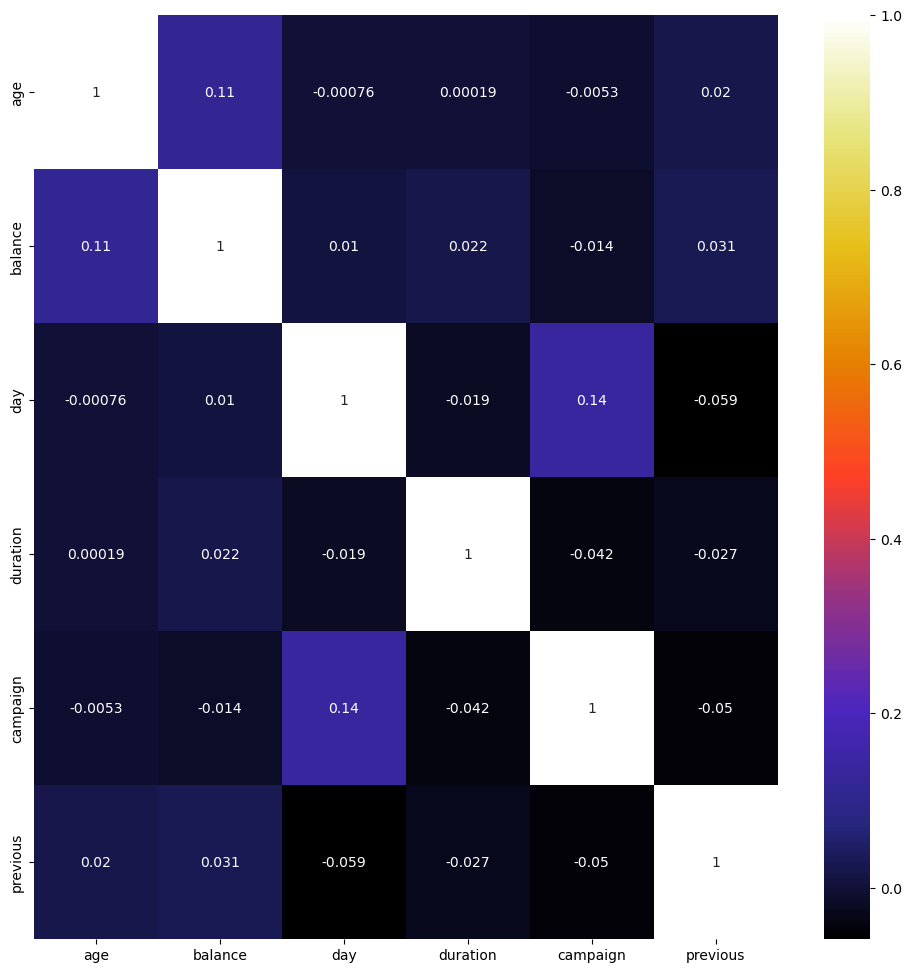

In [64]:

plt.figure(figsize = (12,12))
correlation = df.corr()
sns.heatmap(correlation ,annot =True ,cmap ='CMRmap' )